<h1 style="color:rgb(0,120,170)">Assignment 2: Gaussian Classifier, Bias-Variance Decomposition, Evaluation </h1>

This material, no matter whether in printed or electronic form,
may be used for personal and non-commercial educational use
only. Any reproduction of this material, no matter whether as a
whole or in parts, no matter whether in printed or in electronic
form, requires explicit prior acceptance of the authors.

<h2 style="color:rgb(0,120,170)">Automatic Testing Guidelines</h2>

Automatic unittesting requiers you, as a student, to submit notebook which contains strictly defined objects.
Strictness of definition consists of unified shapes, dtypes, variable names and more.<br>
Within the notebook we provide detailed instruction which you may want to follow in order to maximise your final grade.

**Name your notebook properly**, follow the pattern in template name:

**Assignment_N_NameSurname_matrnumber**
<ol>
    <li>N - number of assignment</li>
    <li>NameSurname - your full name where evry part of the name strats from capital letter, no spaces</li>
    <li>matrnumber - you student number on ID card (without k)</li>
</ol>

Don't add any cells but use the ones provided by us.
You may notice, that most cells are tagged, that is the way for unittest routine to recognise them.
We highly recommend you to develop your code within provided cells. You can implement helper functions where needed unless you put them in the same cell they are actually called. Always make sure, that implemented functions have the correct output and given variables contain the correct data type. **NOTE:** Never use variables you defined in another cell in your functions directly - always pass them to the function as an parameter. In the unitest they won't be available either...

**Please be careful**, and may force be with you.

<h2 style="color:rgb(0,120,170)">Task 1: Gaussian classifier: visualization & parameter estimation</h2>

* Visualize the data stored in `Normal.csv` with two different colors using a scatter plot and store it in the given variable. Always label the axes of all your plots.
* We assume that the data are distributed according to a two-dimensional multivariate normal distribution. Write a function that estimates the means and covariance matrices as well as $p(y=+1)$ and $p(y=-1)$
from data given as a parameter and return a tuple containing the results (the resulting list should be of length 6).

<h3 style="color:rgb(210,90,80)">1.1. Code (10 points):</h3>

In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
import random
%matplotlib inline  

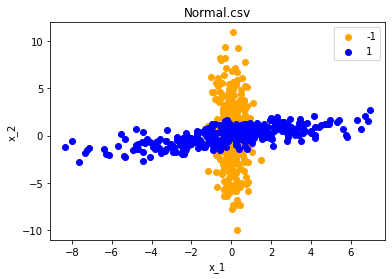

In [2]:
# read data, split into X (features) and y (labels)
Z = np.genfromtxt('normal.csv', delimiter=',')
X, y = Z[:,:-1], Z[:,-1]

#Your code
plot1 = plt.subplots()
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.title('Normal.csv')
cdict = {1: 'blue', -1: 'orange'}
for g in np.unique(y):
    ix = np.where(y == g)
    plot1[1].scatter(X[ix,0], X[ix,1], c = cdict[g], label = int(g))
plot1[1].legend()
plt.show()

In [3]:
"""
Function that estimates the means and covariance matrices from the given data as well as the probability to encounter
a positive/negative example respectively
@param X_, np ndarray, data matrix
@param y_, np ndarray, data vector
"""
def est_mean_cov(X_,y_):  
    #replace the following line with your lines of code
    
    # p(y)

    p_ypos = np.count_nonzero(y_ == 1) / len(y_)
    p_yneg = np.count_nonzero(y_ == -1) / len(y_)
    
    # X
    
    meanXpos = np.array([np.mean(X_[np.where(y_ == 1), 0]), np.mean(X_[np.where(y_ == 1), 1])])
    meanXneg = np.array([np.mean(X_[np.where(y_ == -1), 0]), np.mean(X_[np.where(y_ == -1), 1])])
    
    covXpos = np.cov(X[np.where(y == 1), 0], X[np.where(y == 1), 1])
    covXneg = np.cov(X[np.where(y == -1), 0], X[np.where(y == -1), 1])
    
    return covXpos, meanXpos,p_ypos,covXneg,meanXneg,p_yneg
    
    
covXpos, meanXpos,p_ypos,covXneg,meanXneg,p_yneg = est_mean_cov(X,y)
    
#print corresponding values
print("Positive class (blue):\n")
print("Covarianve:\n")
print(pd.DataFrame(covXpos,columns=["x1","x2"],index=["x1","x2"]),"\n")
print("Mean =", meanXpos, "\n")
print("p(y=+1) =", p_ypos, "\n\n")
print("Negative class (orange):\n")
print("Covarianve:\n")
print(pd.DataFrame(covXneg,columns=["x1","x2"],index=["x1","x2"]),"\n")
print("Mean =", meanXneg, "\n")
print("p(y=+1) =", p_yneg, "\n")

Positive class (blue):

Covarianve:

          x1        x2
x1  8.442267  2.017815
x2  2.017815  0.953326 

Mean = [-0.14820707 -0.03790113] 

p(y=+1) = 0.5 


Negative class (orange):

Covarianve:

          x1         x2
x1  0.198607  -0.161064
x2 -0.161064  12.553366 

Mean = [0.0340324  0.16727881] 

p(y=+1) = 0.5 



<h2 style="color:rgb(0,120,170)">Task 2: Gaussian classifier: compute classifier & visualization</h2>

* Compute an optimal classification function $g$ (see slide 17 from lectures Unit 2) by calculating the values of the corresponding parameters $\mathbf{A}$, $\mathbf{b}$ and $\mathbf{c}$ and store the results in the given parameters par_A,par,b, par_c and func_g. To do this, add the respective calculations to the provided functions. Print the solutions. **Note:** You can reuse the results from the previous exercise here.
* Visualize the classification function and the decision boundaries in a two-dimensional plot.


<h3 style="color:rgb(210,90,80)">2.1 Code (20 points):</h3>

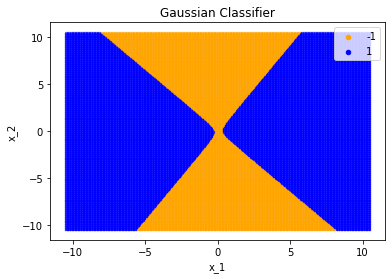

In [4]:
"""
These functions should contain the calculations for the respective Parameter and return the result.
@param covXpos, np ndarray, covariance matrix of positive examples
@param meanXpos, np ndarray, mean of positive examples
@param covXneg, np ndarray, covariance matrix of negativ examples
@param meanXneg, np ndarray, mean of negative examples
"""
def calc_par_A(covXpos, meanXpos,covXneg,meanXneg,p_ypos,p_yneg):
    #replace the following line with your lines of code
    return np.linalg.inv(covXpos) - np.linalg.inv(covXneg)

def calc_par_b(covXpos, meanXpos,covXneg,meanXneg,p_ypos,p_yneg):
    #replace the following line with your lines of code
    return np.matmul(np.linalg.inv(covXpos), meanXpos) - np.matmul(np.linalg.inv(covXneg), meanXneg)

def calc_par_c(covXpos, meanXpos,covXneg,meanXneg,p_ypos,p_yneg):
    #replace the following line with your lines of code
    result = -(1/2) * np.matmul(np.matmul(meanXpos.transpose(), np.linalg.inv(covXpos)), meanXpos) + \
              (1/2) * np.matmul(np.matmul(meanXneg.transpose(), np.linalg.inv(covXneg)), meanXneg) - \
              (1/2) * np.log(np.linalg.det(covXpos)) + (1/2) * np.log(np.linalg.det(covXneg)) + np.log(p_ypos) - np.log(p_yneg)
            
    return result
    
"""
Combine the previously calculates parameters to the optimal classification function g.
@param points, np.array, the points the function g should be applied to
"""
def calc_func_g(par_A, par_b,par_c,points):
    #replace the following line with your lines of code
    func_vals = []
    for point in points:
        func_vals.append(np.sign(-(1/2) * np.matmul(np.matmul(point.transpose(), par_A), point) + np.matmul(par_b.transpose(), point) + par_c))
    
    return np.array(func_vals)

#Some code that should help you
X1, X2 = np.mgrid[-10.5:10.5:500j, -10.5:10.5:500j]
points = np.c_[X1.ravel(), X2.ravel()]


    
par_A = calc_par_A(covXpos, meanXpos,covXneg,meanXneg,p_ypos,p_yneg)
par_b = calc_par_b(covXpos, meanXpos,covXneg,meanXneg,p_ypos,p_yneg)
par_c = calc_par_c(covXpos, meanXpos,covXneg,meanXneg,p_ypos,p_yneg)
func_g = calc_func_g(par_A, par_b,par_c,points)

#your Code
plot2 = plt.subplots()
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.title('Gaussian Classifier')
cdict = {1: 'blue', -1: 'orange'}
for g in np.unique(func_g):
    ix = np.where(func_g == g)
    plot2[1].scatter(points[ix,0], points[ix,1], c = cdict[g], label = int(g), s=0.05)
plot2[1].legend(markerscale=20)
plt.show()

<h2 style="color:rgb(0,120,170)">Task 3: Details for bias-variance decomposition for quadratic loss </h2>

Also an explicit formula of the bias variance decomposition for the quadratic loss was mentioned in the lecture. In this task, you will be asked to fill in some details that haven't been discussed there. To this end, let us introduce some notation:

$Z_l$ denotes a data matrix of $l$ elements from our data set $Z =(X,\mathbf{y})$ with $X$ the feature matrix and $\mathbf{y}$ the label vector. $g(\mathbf{x}_0;\mathbf{w}(Z_l)))$ denotes the model, with a parameter vector $\mathbf{w}(Z_l)$ originating from $Z_l$, and $y$ is the label corresponding to a feature vector $\mathbf{x}_0$. 

Our object of interest is the expected prediction error (EPE) for
$\mathbf{x}_0\in X$ in case of the quadratic loss, i.e.:

$$\mathrm{EPE}(\mathbf{x}_0) = \mathrm{E}_{y\mid
\mathbf{x}_0,Z_l}\big(L_{\mathbf{q}}(y,g(\mathbf{x}_0;\mathbf{w}(Z_l)))\big)
= \mathrm{E}_{y\mid
\mathbf{x}_0,Z_l}\big((y-g(\mathbf{x}_0;\mathbf{w}(Z_l)))^2\big)$$

We assume that $y\mid\mathbf{x}_0$ and the selection of training samples $Z_l$ are
independent which results in the following reformulation of the total expected prediction error:

$$\mathrm{EPE}(\mathbf{x}_0) = \mathrm{E}_{y\mid
\mathbf{x}_0}\Big(\mathrm{E}_{Z_l}\big((y-g(\mathbf{x}_0;\mathbf{w}(Z_l)))^2\big)\Big)$$

Show that we can obtain the following bias-variance decomposition:

\begin{align*}
\mathrm{EPE}(\mathbf{x}_0)=&\,\operatorname{Var}(y\mid\mathbf{x}_0)\\
&+\Big(\mathrm{E}_{y\mid\mathbf{x}_0}(y)-E_{Z_l}\big(g(\mathbf{x}_0;\mathbf{w}(Z_l))\big)\Big)^2\\
&+\mathrm{E}_{Z_l}\Big(\big(g(\mathbf{x}_0;\mathbf{w}(Z_l))-E_{Z_l}(g(\mathbf{x}_0;\mathbf{w}(Z_l)))\big)^2\Big)
\end{align*}

For your calculation please use the given notation.

<h3 style="color:rgb(210,90,80)">3.1 Calculation (5 points): Expand the quardratic loss.</h3>

$$\mathrm{EPE}(\mathbf{x}_0) = \mathrm{E}_{y\mid\mathbf{x}_0}\Big(\mathrm{E}_{Z_l}\big((y-g(\mathbf{x}_0;\mathbf{w}(Z_l)))^2\big)\Big)=$$

$$=\mathrm{E}_{y|x_0}\Big(\mathrm{E}_{Z_l}\big(y²-2*y*g(\mathbf{x}_0;\mathbf{w}(Z_l))+g(\mathbf{x}_0;\mathbf{w}(Z_l))^2\big)\Big)=$$

$$=\mathrm{E}_{y|x_0}\Big(y^2-2*y*\mathrm{E}_{Z_l}(g(\mathbf{x}_0;\mathbf{w}(Z_l)))+\mathrm{E}_{Z_l}(g(\mathbf{x}_0;\mathbf{w}(Z_l))^2)\Big)=$$

$$=\mathrm{E}_{y|x_0}(y^2)-2*\mathrm{E}_{y|x_0}(y)*\mathrm{E}_{Z_l}(g(\mathbf{x}_0;\mathbf{w}(Z_l)))+\mathrm{E}_{Z_l}(g(\mathbf{x}_0;\mathbf{w}(Z_l))^2)=$$

$$=\mathrm{E}_{y|x_0}(y^2)-\mathrm{E}_{y|x_0}(y)^2+\mathrm{E}_{y|x_0}(y)^2-2*\mathrm{E}_{y|x_0}(y)*\mathrm{E}_{Z_l}(g(\mathbf{x}_0;\mathbf{w}(Z_l)))+\mathrm{E}_{Z_l}(g(\mathbf{x}_0;\mathbf{w}(Z_l)))^2+\mathrm{E}_{Z_l}(g(\mathbf{x}_0;\mathbf{w}(Z_l))^2)-\mathrm{E}_{Z_l}(g(\mathbf{x}_0;\mathbf{w}(Z_l)))^2$$

<h3 style="color:rgb(210,90,80)">3.2 Calculation (2 points): Rewrite $\operatorname{Var}(y\mid\mathbf{x}_0)$ using expected values. </h3>

$$\operatorname{Var}(y\mid\mathbf{x}_0) =$$

$$=\mathrm{E}_{y|x_0}(y^2)-\mathrm{E}_{y|x_0}(y)^2$$

<h3 style="color:rgb(210,90,80)">3.3. Calculation (3 points): Expand the squared bias.</h3>

$$\Big(\mathrm{E}_{y\mid\mathbf{x}_0}(y)-E_{Z_l}\big(g(\mathbf{x}_0;\mathbf{w}(Z_l))\big)\Big)^2 =$$

$$=\mathrm{E}_{y\mid\mathbf{x}_0}(y)^2 - 2*\mathrm{E}_{y\mid\mathbf{x}_0}(y)*E_{Z_l}\big(g(\mathbf{x}_0;\mathbf{w}(Z_l))\big) + E_{Z_l}\big(g(\mathbf{x}_0;\mathbf{w}(Z_l))\big)^2$$

<h3 style="color:rgb(210,90,80)">3.4 Calculation (5 points): Expand the variance of the model.</h3>

$$\mathrm{E}_{Z_l}\Big(\big(g(\mathbf{x}_0;\mathbf{w}(Z_l))-E_{Z_l}\big(g(\mathbf{x}_0;\mathbf{w}(Z_l))\big)\big)^2\Big) =$$

$$=\mathrm{E}_{Z_l}\Big(g(\mathbf{x}_0;\mathbf{w}(Z_l))^2 - 2*g(\mathbf{x}_0;\mathbf{w}(Z_l))*E_{Z_l}\big(g(\mathbf{x}_0;\mathbf{w}(Z_l))\big) + E_{Z_l}\big(g(\mathbf{x}_0;\mathbf{w}(Z_l))\big)^2\Big)=$$

$$=\mathrm{E}_{Z_l}(g(\mathbf{x}_0;\mathbf{w}(Z_l))^2)-2*\mathrm{E}_{Z_l}(g(\mathbf{x}_0;\mathbf{w}(Z_l)))^2+\mathrm{E}_{Z_l}(g(\mathbf{x}_0;\mathbf{w}(Z_l)))^2=$$

$$=\mathrm{E}_{Z_l}(g(\mathbf{x}_0;\mathbf{w}(Z_l))^2)-\mathrm{E}_{Z_l}(g(\mathbf{x}_0;\mathbf{w}(Z_l)))^2$$

<h2 style="color:rgb(0,120,170)">Task 4: Bias-variance decomposition for regression </h2>

<h3 style="color:rgb(210,90,80)">4.1 Question (5 points):</h3>

Consider the following one-dimensional regression task: inputs $x$ are
sampled from the uniform distribution in $[−1, 3] \subset \mathbb{R}$ and targets $y$ are given as

\begin{align*}
f(x) &= 0.6\,x^4 + 2\,x^3 - 8\,x^2 \\
y &= f(x) + \varepsilon,
\end{align*}

where $\varepsilon$ is independent normally distributied noise with $\mu=0$ and $\sigma^2 = 0.09$. 

* What are $E(y \mid x_0)$ and the unavoidable error $\operatorname{Var}(y \mid x_0)$ for a fixed $x_0$ in this setting?

a_)  $E(y \mid x_0) = 0.6x_0^4 + 2x_0^3 - 8x_0^2 \text{ and }\operatorname{Var}(y \mid x_0) = \sigma^2$. <br>
b_)   $E(y \mid x_0) = 0.6\sigma^4 + 2\sigma^3 - 8\sigma^2 \text{    and    } \operatorname{Var}(y \mid x_0) = x_0^2$. <br>
c_)   $E(y \mid x_0) = 0 \text{ and }  \operatorname{Var}(y \mid x_0) = \sigma^2$. <br>
d_)   $E(y \mid x_0) = 0.6x_0^4 + 2x_0^3 - 8x_0^2 \text{    and    } \operatorname{Var}(y \mid x_0) = 0.6x_0^4 + 2x_0^3 - 8x_0^2+\sigma^2$.<br>

To answer the question assign to variables in the nex cell **True** or **False** boolean values. 
To earn points **assign values to all variables**.<br>
**NOTE** Do not reuse these variable names. They are used for testing.


In [5]:
#examples for you
example_of_true_variable = True
example_of_false_variable = False

#your answers go here ↓↓↓
a_=True
b_=False
c_=False
d_=False

We intend to perform polynomial regression to illustrate the bias-variance decomposition for the regression task described before. To this end, perform the following steps.
 * Implement the function "create_train_X", it should return $k=200$ training sets with $l=20$ samples in form of a numpy array.
 * Implement the function "create_train_y" according to the function described at the beginning of this task.
 * Below, we provide the code for a function that trains a polynomial regression model with degree $m$ on a given training set and returns the prediction for a given test set.
 Use this function to produce <em>one</em> plot that simultaneously visualizes the training data as dots (plot only the <em>first</em> instance of the $k$ training sets) and the corresponding models for $m=1,4,11$. Don't forget to label the axes. **Note:** Make sure to produce the plot in the correct (second) cell. 
 * Implement the function bias_var that estimates for each degree $m=1,...,11$ the squared bias and the variance from the predictions for each of the $k=200$ training sets at $x_0=1.8$ and stores them in the lists sqbias and variance (which are already initiated as empty lists). Each of these two lists should then only contain $11$ elements. Finally visualize your results in <em>one</em> plot where the dependence of the variance and squared bias versus $m$ is shown. Again, the axes should be labeled appropriately.

<h3 style="color:rgb(210,90,80)">4.2 Code (30 points):</h3>

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

#some code that should help you
np.random.seed(14)

def pol_reg_pred(X_train,y_train,X_test,m):
    poly_reg = PolynomialFeatures(m)
    X_poly_train = poly_reg.fit_transform(X_train.reshape(-1, 1))
    X_poly_test= poly_reg.fit_transform(X_test.reshape(-1, 1))
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly_train, y_train)
    y_pred = lin_reg.predict(X_poly_test)
    return y_pred

def f(x):
    return 0.6 * x**4 + 2 * x**3 - 8 * x**2

#Your Code
def create_train_X():
    #replace the following line with your lines of code
    return np.random.uniform(low=-1, high=3, size=(200, 20))
    
def create_train_y(X):
    #replace the following line with your lines of code
    return f(X) + np.random.normal(loc=0, scale=0.3, size=X.shape)
    
X_train = create_train_X()
y_train = create_train_y(X_train)

def bias_var(): 
    x0 = np.array([1.8])
    sqbias = []
    variance = []
    
    #replace the following line with your lines of code
    for degree in range(1, 12):
        y_preds = []
        for x_set, y_set in zip(X_train, y_train):
            y_preds.append(pol_reg_pred(x_set, y_set, x0, degree))
            
        variance.append(np.mean(np.power(y_preds, 2)) - np.power(np.mean(y_preds), 2))
        sqbias.append(np.power((f(x0) - np.mean(y_preds)), 2))
            
    
    return (sqbias,variance)
    
sqbias, variance = bias_var()


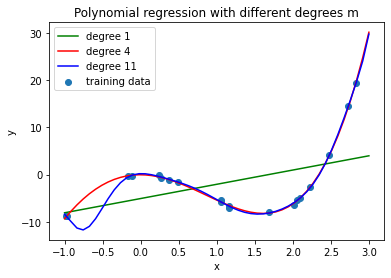

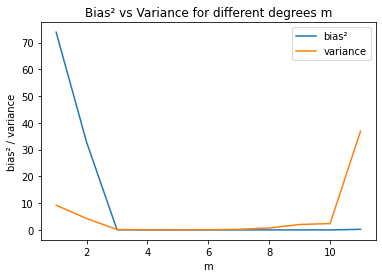

In [7]:
#Your code
plot3 = plt.subplots()

plot3[1].scatter(X_train[0], y_train[0], label="training data")

x_plot = np.linspace(-1, 3)
colors = ["green", "red", "blue"]
for n, degree in enumerate([1, 4, 11]):
    y_pred = pol_reg_pred(X_train[0], y_train[0], x_plot, degree)
    plot3[1].plot(x_plot, y_pred, c=colors[n], label=f"degree {degree}")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Polynomial regression with different degrees m")
plt.legend()


plot4 = plt.subplots()

m_degree = list(range(1, 12))
plot4[1].plot(m_degree, sqbias, label="bias²")
plot4[1].plot(m_degree, variance, label="variance")
plt.xlabel("m")
plt.ylabel("bias² / variance")
plt.title("Bias² vs Variance for different degrees m")
plt.legend()

<h3 style="color:rgb(210,90,80)">4.3 Question (5 points):</h3>

If you did the previous task correctly, the resulting plot should look like this:
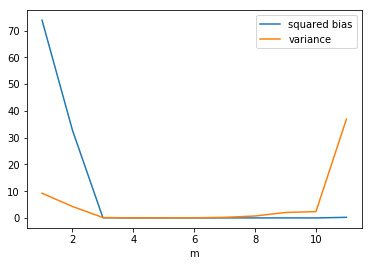    


What observations can you make from this plot? Tick the correct boxes (several may be correct):


e_)   For appropriate complexity, i.e. $3 \leq m < 7$, both model variance and bias are low, which indicates good generalization abilities. <br>
f_) The variance is lowest for models which are too simple, i.e. $m<3$.<br>
g_)   As the model becomes too complex, i.e. $m \geq 7$, the variance increases again while the bias still decreases. This is an indication for underfitting.<br>
h_) For models with $m \geq 7$, the bias is still low (i.e. close to $0$) because the independent noise has zero mean and high individual biases cancel in expectation. <br>
i_)  For models with $m \geq 7$, the variance is high (i.e. significantly larger than $0$) because the independent noise has zero mean and high individual biases cancel in expectation. <br>

In [8]:
#examples for you
example_of_true_variable = True
example_of_false_variable = False

#your answers go here ↓↓↓
e_=True
f_=False
g_=False
h_=False
i_=True

<h2 style="color:rgb(0,120,170)">Task 5: Evaluation Metrics for imbalanced Data Sets </h2>

Consider a classifier with discriminant function $\bar g$.
For a given labeled data set, the following results are obtained:
$$\begin{array}{|r|r|}
\hline
y & \bar g(x)\\
\hline \hline
 +1 & 0.93 \\
 +1 & 0.55 \\
 +1 & 0.48 \\
 +1 & 0.13 \\
 -1 & 0.02 \\
 -1 & -0.11 \\
 -1 & -0.25 \\
 +1 & -0.39 \\
 -1 & -0.41 \\
 -1 & -1.68 \\
 -1 & -2.23 \\
\hline
\end{array}$$

Compute the confusion matrix using the usual zero threshold.
Complete the given function to calculate the following evaluation measures:
ACC, TPR, TNR, FPR, FNR, PREC, and $F_1$ and store the exact results in the respective variables.

<h3 style="color:rgb(210,90,80)">5.1 Calculation (8 points):</h3>

* Confusion Matrix: Assume that the rows correspond to $g(x)$, the columns to the true labels $y$.

$$
\begin{array}{|r|r|r|}
\hline
 &\bar g(x)=+1  & \bar g(x)=-1\\
 \hline
 y=+1 &  & \\
 \hline
 y=-1 &  & \\
\hline
\end{array}
$$

* ACC: 

* TPR:

* TNR:

* FPR:

* FNR:

* PREC:

* BACC:

* F1: 


In [9]:
#confusion matrix
_TP = 4
_TN = 5
_FP = 1
_FN = 1

#evaluation measures
def evaluate_measures(TP,TN,FP,FN):
    #replace the following line with your lines of code
    ACC = (TP + TN) / (TP + TN + FP + FN)
    
    TPR = TP / (TP + FN)
    TNR = TN / (TN + FP)
    
    FPR = FP / (TN + FP)
    FNR = FN / (TP + FN)
    
    PREC = TP / (TP + FP)
    BACC = (TPR + TNR) / 2
    F1 = 2 * (PREC * TPR) / (PREC + TPR)
    
    return (ACC,TPR,TNR,FPR,FNR,PREC,BACC,F1)
    
_ACC,_TPR,_TNR,_FPR,_FNR,_PREC,_BACC,_F1 = evaluate_measures(_TP,_TN,_FP,_FN)

print("ACC: {}\nTPR: {}\nTNR: {}\nFPR: {}\nFNR: {}\nPREC: {}\nBACC: {}\nF1: {}".format(_ACC,_TPR,_TNR,_FPR,_FNR,_PREC,_BACC,_F1))

ACC: 0.8181818181818182
TPR: 0.8
TNR: 0.8333333333333334
FPR: 0.16666666666666666
FNR: 0.2
PREC: 0.8
BACC: 0.8166666666666667
F1: 0.8000000000000002


Let's say we have a population of 1000 people and we know that 50 are infected with the corona virus.
* Assume that the population is tested with an assay that has a certain specificity and sensitivity. What is the probability that a person isn't infected if diagnosed as ill by the test? Write a function that returns the desired value (rounded to 3 decimal points). Then check your calculation using specificity of $98 \%$ and sensitivity of $99 \%$.

<h3 style="color:rgb(210,90,80)">5.2 Calculation (7 points):</h3>

In [10]:
"""
This function should return the desired percentage. 
@param spec, float, specificity
@param sens, float, sensitivity
"""
def calc_prob(spec,sens):
    population = 1000
    infected = 50

    #replace the following line with your lines of code
    p_infected = infected / population
    p_healthy = 1 - p_infected
    
    return ((1 - spec) * p_healthy) / ((1 - spec) * p_healthy + sens * p_infected)
    
_result = calc_prob(0.98,0.99)
print("The probability that a person isn't infected if tested positive is {}".format(_result))

The probability that a person isn't infected if tested positive is 0.2773722627737228


In [11]:
#executability check
est_mean_cov(X,y)
calc_par_A(np.eye(2),np.ones(shape=2),np.eye(2),np.ones(shape=2),1,1)
calc_par_b(np.eye(2),np.ones(shape=2),np.eye(2),np.ones(shape=2),1,1)
calc_par_c(np.eye(2),np.ones(shape=2),np.eye(2),np.ones(shape=2),1,1)
calc_func_g(np.ones(shape=(2,2)),np.ones(2),1,np.ones(shape=(250000,2)))
create_train_X()
create_train_y(np.ones(shape=(200,20)))
bias_var()
evaluate_measures(1,1,1,1)
calc_prob(1,1)

print("Executable")

Executable
